In [1]:
import pandas as pd
import os
import sys
from sklearn.preprocessing import StandardScaler
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
from models.random_forest import random_forest
from models.random_forest import run_backtest
notebook_path = os.path.abspath(os.path.join(os.getcwd(), '../notebooks'))
input_file_path = rf'{notebook_path}\data\processed'
model_output_filepath = rf'{notebook_path}\output\model'

Training Data (Tick Numbers and Timestamps):
   tick_number            datetime
3            3 2023-01-01 18:58:00
4            4 2023-01-01 19:39:00
5            5 2023-01-01 20:03:00
6            6 2023-01-01 20:04:00
7            7 2023-01-01 20:10:00

Testing Data (Tick Numbers and Timestamps):
      tick_number            datetime
4360         4360 2023-07-31 10:48:00
4361         4361 2023-07-31 10:54:00
4362         4362 2023-07-31 14:00:00
4363         4363 2023-07-31 14:16:00
4364         4364 2023-07-31 16:04:00

Backtesting Data (Tick Numbers and Timestamps):
      tick_number            datetime    price  actual_openprice  ticks_moved  \
5812         5812 2023-10-12 13:03:00  1.21915           1.21913            1   
5813         5813 2023-10-12 13:36:00  1.21815           1.21808            1   
5814         5814 2023-10-12 21:20:00  1.21915           1.21923            1   
5815         5815 2023-10-12 22:27:00  1.22015           1.22022            1   
5816         5816 

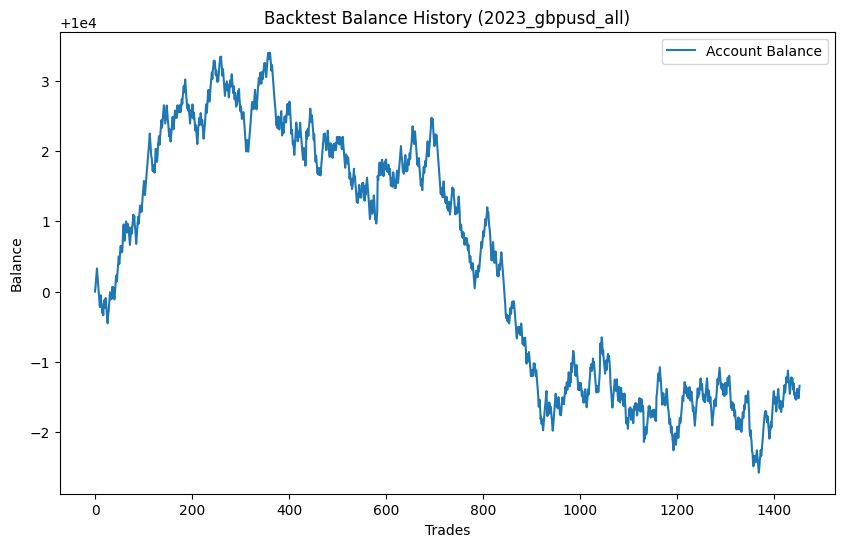

Training Data (Tick Numbers and Timestamps):
   tick_number            datetime
3            3 2023-01-01 19:05:00
4            4 2023-01-01 19:14:00
5            5 2023-01-01 19:35:00
6            6 2023-01-01 19:36:00
7            7 2023-01-01 21:06:00

Testing Data (Tick Numbers and Timestamps):
      tick_number            datetime
6310         6310 2023-07-20 10:58:00
6311         6311 2023-07-20 12:07:00
6312         6312 2023-07-20 14:00:00
6313         6313 2023-07-20 16:00:00
6314         6314 2023-07-20 18:01:00

Backtesting Data (Tick Numbers and Timestamps):
      tick_number            datetime    price  actual_openprice  ticks_moved  \
8412         8412 2023-11-01 00:10:00  151.325           151.346            1   
8413         8413 2023-11-01 02:02:00  151.225           151.215            1   
8414         8414 2023-11-01 02:47:00  151.325           151.352            1   
8415         8415 2023-11-01 03:54:00  151.225           151.220            1   
8416         8416 

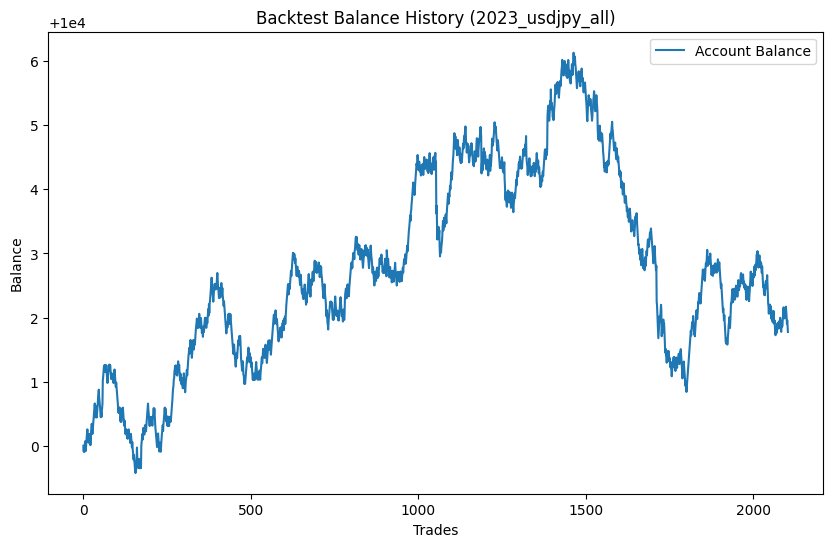

Training Data (Tick Numbers and Timestamps):
   tick_number            datetime
3            3 2023-01-01 18:21:00
4            4 2023-01-02 01:56:00
5            5 2023-01-02 02:27:00
6            6 2023-01-02 02:53:00
7            7 2023-01-02 03:00:00

Testing Data (Tick Numbers and Timestamps):
      tick_number            datetime
2629         2629 2023-08-01 01:59:00
2630         2630 2023-08-01 03:04:00
2631         2631 2023-08-01 03:10:00
2632         2632 2023-08-01 05:19:00
2633         2633 2023-08-01 06:04:00

Backtesting Data (Tick Numbers and Timestamps):
      tick_number            datetime   price  actual_openprice  ticks_moved  \
3504         3504 2023-10-16 02:57:00  1.0537           1.05380            1   
3505         3505 2023-10-16 03:09:00  1.0527           1.05250            1   
3506         3506 2023-10-16 04:46:00  1.0537           1.05375            1   
3507         3507 2023-10-16 07:09:00  1.0527           1.05266            1   
3508         3508 2023-

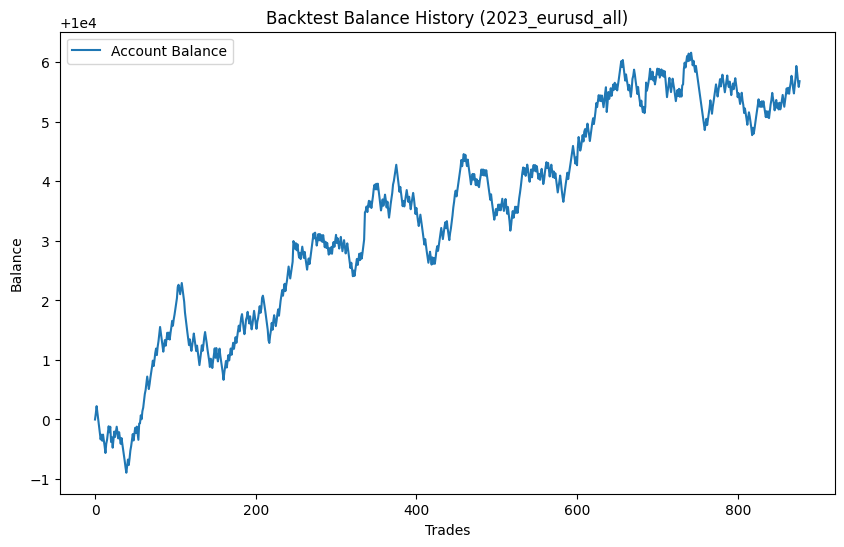

Training Data (Tick Numbers and Timestamps):
   tick_number            datetime
3            3 2023-01-01 18:52:00
4            4 2023-01-01 18:53:00
5            5 2023-01-01 18:57:00
6            6 2023-01-01 19:46:00
7            7 2023-01-01 21:16:00

Testing Data (Tick Numbers and Timestamps):
      tick_number            datetime
1113         1113 2023-07-19 12:01:00
1114         1114 2023-07-19 14:00:00
1115         1115 2023-07-19 16:45:00
1116         1116 2023-07-20 00:08:00
1117         1117 2023-07-20 02:42:00

Backtesting Data (Tick Numbers and Timestamps):
      tick_number            datetime    price  actual_openprice  ticks_moved  \
1483         1483 2023-10-04 10:26:00  0.86572           0.86581            1   
1484         1484 2023-10-04 12:37:00  0.86472           0.86468            1   
1485         1485 2023-10-04 20:08:00  0.86572           0.86573            1   
1486         1486 2023-10-05 04:31:00  0.86672           0.86721            1   
1487         1487 

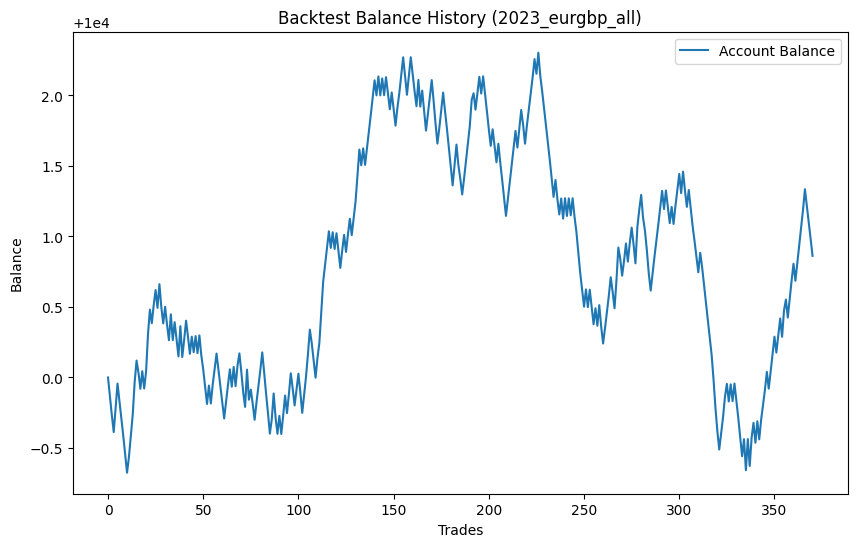

In [3]:
year = "2023"
ccys = ["gbpusd", "usdjpy", "eurusd", "eurgbp"]
session = 'all'

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_tick_prev_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest(df, year, ccy, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)